In [39]:
import getDays

todayInfo = getDays.getToday()
yesterdayInfo = getDays.getYesterday()
print(todayInfo)
print(yesterdayInfo)
tomorrowInfo = getDays.getTomorrow()

month, month_num, date, year = todayInfo[0], todayInfo[1], todayInfo[2], todayInfo[3]
yesterday = yesterdayInfo[2]
yesterday = int(yesterday)
month_num = int(month_num)
nextDay = tomorrowInfo[2]
nextDay = int(nextDay)
date = int(date)

('October', '10', '9', '2023')
('October', '10', '8', '2023')


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
from datetime import datetime
import sqlalchemy
import mysql.connector
import sqlite3
import getDays
import pymysql as dbapi

sta = ['Davis', 'Tempest']
path1 = '/var/www/html/000/'

#
# Get data from the Davis F6 table first
#

QUERY = """SELECT * FROM davisF6 
           WHERE month = %s""" % (month_num)


db = dbapi.connect(host='3.135.162.69',user='chuckwx',passwd='jfr716!!00', database = 'davisf6')

cur = db.cursor()
cur.execute(QUERY)
records = cur.fetchall()

#
# Now the Tempest F6 table
#

QUERY1 = """SELECT * FROM tempestF6 
           WHERE month = %s""" % (month_num)


db = dbapi.connect(host='3.135.162.69',user='chuckwx',passwd='jfr716!!00', database = 'tempestf6')

cur = db.cursor()
cur.execute(QUERY1)
records1 = cur.fetchall()

Davis


/var/folders/m3/83tjf6dx2d591wslk5wm2wdh0000gn/T/ipykernel_39232/1393388101.py:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


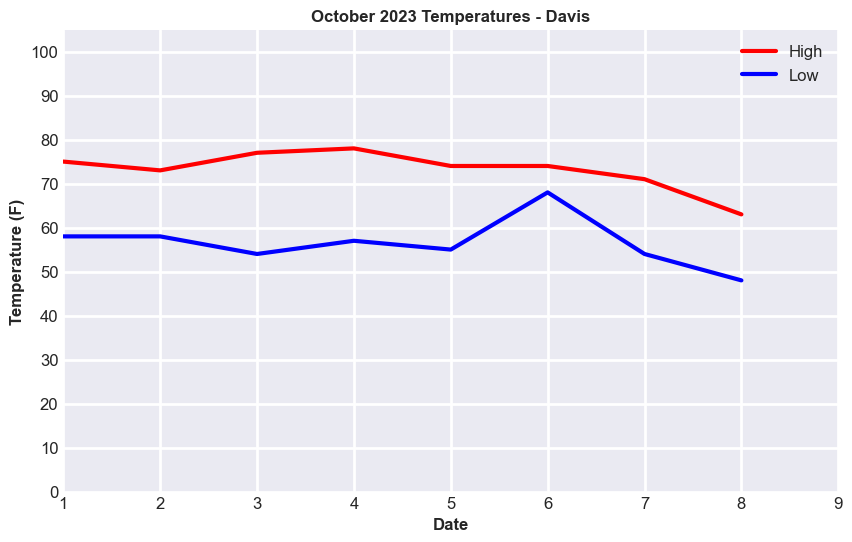

Tempest


/var/folders/m3/83tjf6dx2d591wslk5wm2wdh0000gn/T/ipykernel_39232/1393388101.py:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


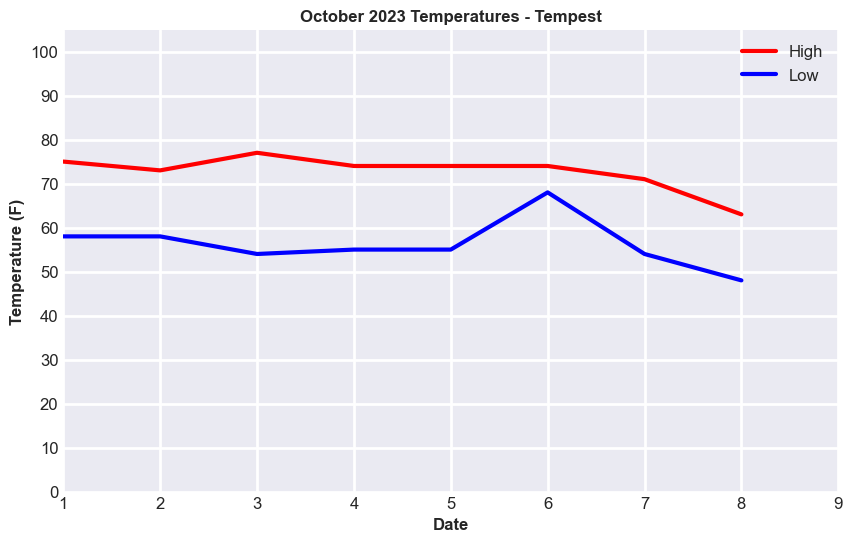

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

sta = ['Davis', 'Tempest']

for qwe in sta:
    print(qwe)
    sta = ['Davis', 'Tempest']

    #
    # Dump the data into a pandas DataFrame
    #

    if qwe == 'Davis':
        df = pd.DataFrame(records, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'Rainfall', 'Max_Dew_Point'])
        df = df.drop(df.columns[[0,6,7]], axis=1)
    else:
        df = pd.DataFrame(records1, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'totR', 'corR', 'Lightning1_5', 'Lightning6_10'])
        df = df.drop(df.columns[[0,6,7,8,9]], axis=1) 


    df['Date'] = df['Date'].astype(int)
    df['High'] = df['High'].astype(int)
    df['Low'] = df['Low'].astype(int)
    
    HI = df['High']
    LO = df['Low']
    DATE = df['Date']

    y = HI.to_numpy()
    y1 = LO.to_numpy()
    x = DATE.to_numpy()
    
    plt.style.use('seaborn-darkgrid')
    
    path1 = '/var/www/html/000/'
    plt.figure(figsize= (10,6))
    plt.locator_params(axis = 'x', nbins = date)
    plt.xlim(1, date)
    plt.ylim(0, 105)
    plt.xticks(fontsize=12)
    plt.xlabel('Date', fontsize=12, fontweight ='bold')
    plt.yticks(fontsize=12)
    plt.ylabel('Temperature (F)', fontsize=12, fontweight ='bold')
    plt.locator_params(axis='y', nbins=20)
    plt.title(f'{month} {year} Temperatures - {qwe}', fontsize=12, fontweight ='bold')
    plt.grid(axis = "y", linewidth = 2.0, color = 'white')
    plt.grid(axis = "x", linewidth = 2.0, color = 'white')
    plt.plot(x, y, color = "red", linewidth =3, label ="High")
    plt.plot(x, y1, color = "blue", linewidth =3, label ="Low")
    plt.legend(fontsize = 12)
    #plt.savefig(f'{path1}newTemps_{qwe}')   
    plt.show()